<a href="https://colab.research.google.com/github/rhanessian/dl-parakeets/blob/main/DLParakeets2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! ls -hl

total 4.0K
drwxr-xr-x 1 root root 4.0K May  6 13:44 sample_data


In [2]:
! rm -rf parakeets

In [3]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [4]:
! ls -hl

total 4.0K
drwxr-xr-x 1 root root 4.0K May  6 13:44 sample_data


In [5]:
## Load tar files of data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
## Check files have loaded
! ls -hl

total 8.0K
drwx------ 5 root root 4.0K May  7 23:15 gdrive
drwxr-xr-x 1 root root 4.0K May  6 13:44 sample_data


In [7]:
## Create data stage
! mkdir parakeets

In [8]:
! ls -hl

total 12K
drwx------ 5 root root 4.0K May  7 23:15 gdrive
drwxr-xr-x 2 root root 4.0K May  7 23:15 parakeets
drwxr-xr-x 1 root root 4.0K May  6 13:44 sample_data


In [9]:
! ls -al parakeets/

total 8
drwxr-xr-x 2 root root 4096 May  7 23:15 .
drwxr-xr-x 1 root root 4096 May  7 23:15 ..


In [10]:
## Extract data from tar files
! tar -zxf gdrive/MyDrive/parakeet_tars/'alexandrine Psittacula eupatria.tar.gz' -C parakeets/ && mv parakeets/'alexandrine Psittacula eupatria' parakeets/alexandrine
! tar -zxf gdrive/MyDrive/parakeet_tars/'bourke Neosephotus bourkii.tar.gz' -C parakeets/ && mv parakeets/'bourke Neosephotus bourkii' parakeets/bourke
! tar -zxf gdrive/MyDrive/parakeet_tars/'budgerigar Melopsittacus undulatus.tar.gz' -C parakeets/ && mv parakeets/'budgerigar Melopsittacus undulatus' parakeets/budgie
! tar -zxf gdrive/MyDrive/parakeet_tars/'derbyan Psittacula derbiana.tar.gz' -C parakeets/ && mv parakeets/'derbyan Psittacula derbiana' parakeets/derbyan
! tar -zxf gdrive/MyDrive/parakeet_tars/'lineolated_barred Bolborhynchus lineola.tar.gz' -C parakeets/ && mv parakeets/'lineolated_barred Bolborhynchus lineola' parakeets/lineolated
! tar -zxf gdrive/MyDrive/parakeet_tars/'monk Myiopsitta monachus.tar.gz' -C parakeets/ && mv parakeets/'monk Myiopsitta monachus' parakeets/monk
! tar -zxf gdrive/MyDrive/parakeet_tars/'moustache_red-breasted Psittacula alexandri.tar.gz' -C parakeets/ && mv parakeets/'moustache_red-breasted Psittacula alexandri' parakeets/moustache
! tar -zxf gdrive/MyDrive/parakeet_tars/'plain Brotogeris tirica.tar.gz' -C parakeets/ && mv parakeets/'plain Brotogeris tirica' parakeets/plain
! tar -zxf gdrive/MyDrive/parakeet_tars/'plum-headed Psittacula cyanocephala.tar.gz' -C parakeets/ && mv parakeets/'plum-headed Psittacula cyanocephala' parakeets/plum
! tar -zxf gdrive/MyDrive/parakeet_tars/'regent Polytelis anthopeplus.tar.gz' -C parakeets/ && mv parakeets/'regent Polytelis anthopeplus' parakeets/regent
! tar -zxf gdrive/MyDrive/parakeet_tars/'ring-necked Psittacula krameri.tar.gz' -C parakeets/ && mv parakeets/'ring-necked Psittacula krameri' parakeets/ring



In [11]:
! ls -al parakeets/

total 140
drwxr-xr-x 13 root root  4096 May  7 23:16 .
drwxr-xr-x  1 root root  4096 May  7 23:15 ..
drwxrwxrwx  2 root root 12288 Apr 16 02:01 alexandrine
drwxrwxrwx  2 root root 12288 Apr 16 01:46 bourke
drwxrwxrwx  2 root root 12288 Apr 16 18:58 budgie
drwxrwxrwx  2 root root 12288 Apr 16 01:15 derbyan
drwxrwxrwx  2 root root 12288 Apr 16 00:53 lineolated
drwxrwxrwx  2 root root 12288 Apr 16 01:15 monk
drwxrwxrwx  2 root root 12288 Apr 16 01:16 moustache
drwxrwxrwx  2 root root 12288 Apr 16 01:17 plain
drwxrwxrwx  2 root root 12288 Apr 16 01:17 plum
drwxrwxrwx  2 root root 12288 Apr 16 01:18 regent
drwxrwxrwx  2 root root 12288 Apr 16 01:29 ring


In [12]:
! ls -hl

total 12K
drwx------  5 root root 4.0K May  7 23:15 gdrive
drwxr-xr-x 13 root root 4.0K May  7 23:16 parakeets
drwxr-xr-x  1 root root 4.0K May  6 13:44 sample_data


In [13]:
## Show distribution
! for d in $(ls ./parakeets); do samples=$(ls ./parakeets/${d} | wc -l); echo ${d} ${samples}; done


alexandrine 210
bourke 215
budgie 202
derbyan 206
lineolated 201
monk 204
moustache 204
plain 201
plum 209
regent 201
ring 214


Resize images

In [14]:
import numpy
import os
import PIL
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from os import listdir
from matplotlib import image

In [15]:
# Resize images
data_images = os.path.join('parakeets', '.')
for parapics in os.listdir(data_images):
  directory = os.path.join(data_images, parapics)
  for dat in os.listdir(directory):
    image = Image.open(os.path.join(directory, dat))
    img_p = image.resize((256, 256))
    img_p.save(os.path.join(directory, dat))

In [16]:
! ls -hl parakeets/alexandrine

total 2.7M
-rwxrwxrwx 1 root root 4.2K May  7 23:16 'alexandrine (100).JPG'
-rwxrwxrwx 1 root root  19K May  7 23:16 'alexandrine (101).jpg'
-rwxrwxrwx 1 root root  13K May  7 23:16 'alexandrine (102).JPG'
-rwxrwxrwx 1 root root 9.4K May  7 23:16 'alexandrine (103).JPG'
-rwxrwxrwx 1 root root  17K May  7 23:16 'alexandrine (104).JPG'
-rwxrwxrwx 1 root root  14K May  7 23:16 'alexandrine (105).JPG'
-rwxrwxrwx 1 root root  12K May  7 23:16 'alexandrine (106).jpg'
-rwxrwxrwx 1 root root  12K May  7 23:16 'alexandrine (107).jpg'
-rwxrwxrwx 1 root root 5.4K May  7 23:16 'alexandrine (108).JPG'
-rwxrwxrwx 1 root root  13K May  7 23:16 'alexandrine (109).JPG'
-rwxrwxrwx 1 root root 7.7K May  7 23:16 'alexandrine (10).JPG'
-rwxrwxrwx 1 root root  11K May  7 23:16 'alexandrine (110).jpg'
-rwxrwxrwx 1 root root  17K May  7 23:16 'alexandrine (111).JPG'
-rwxrwxrwx 1 root root 9.0K May  7 23:16 'alexandrine (112).jpg'
-rwxrwxrwx 1 root root 9.0K May  7 23:16 'alexandrine (113).JPG'
-rwxrwxrwx 1 ro

In [17]:
import cv2
import os
import numpy
import os
import PIL
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from os import listdir
from matplotlib import image
sample_images_loaded = list()
for filename in listdir('parakeets/alexandrine'):
  img_data = image.imread('parakeets/alexandrine/' + filename)
  sample_images_loaded.append(img_data)
  print('> loaded %s %s' % (filename, img_data.shape))

> loaded alexandrine (87).JPG (256, 256, 3)
> loaded alexandrine (202).JPG (256, 256, 3)
> loaded alexandrine (60).JPG (256, 256, 3)
> loaded alexandrine (168).jpg (256, 256, 3)
> loaded alexandrine (2).JPG (256, 256, 3)
> loaded alexandrine (116).JPG (256, 256, 3)
> loaded alexandrine (133).JPG (256, 256, 3)
> loaded alexandrine (182).JPG (256, 256, 3)
> loaded alexandrine (115).JPG (256, 256, 3)
> loaded alexandrine (127).JPG (256, 256, 3)
> loaded alexandrine (135).JPG (256, 256, 3)
> loaded alexandrine (125).JPG (256, 256, 3)
> loaded alexandrine (63).JPG (256, 256, 3)
> loaded alexandrine (166).jpg (256, 256, 3)
> loaded alexandrine (65).JPG (256, 256, 3)
> loaded alexandrine (162).jpg (256, 256, 3)
> loaded alexandrine (78).JPG (256, 256, 3)
> loaded alexandrine (203).JPG (256, 256, 3)
> loaded alexandrine (159).jpg (256, 256, 3)
> loaded alexandrine (148).JPG (256, 256, 3)
> loaded alexandrine (121).JPG (256, 256, 3)
> loaded alexandrine (134).JPG (256, 256, 3)
> loaded alexandr


Image data generator



In [18]:
from keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [19]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [20]:
image_generator = my_generator.flow_from_directory('./parakeets', target_size=(256, 256), batch_size=11, class_mode='categorical')

Found 2267 images belonging to 11 classes.


This is label key:
['alexandrine', 'bourke', 'budgie', 'derbyan', 'lineolated', 'monk', 'moustache', 'plain', 'plum', 'regent', 'ring']


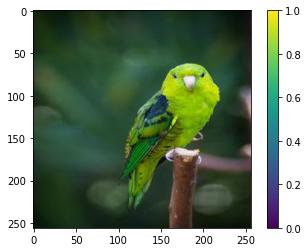

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


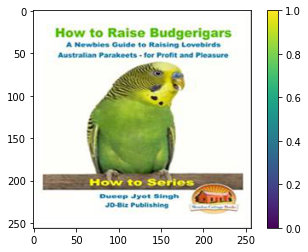

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


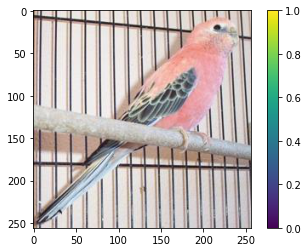

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


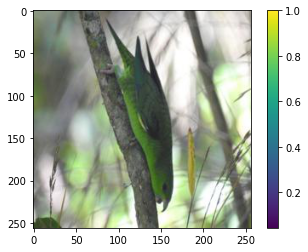

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


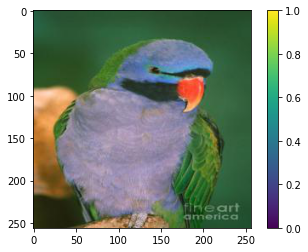

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


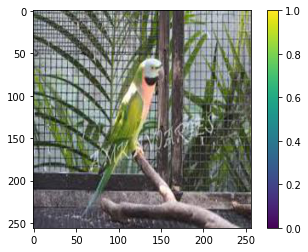

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


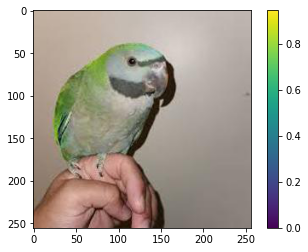

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


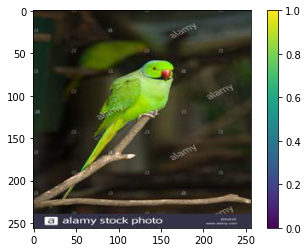

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


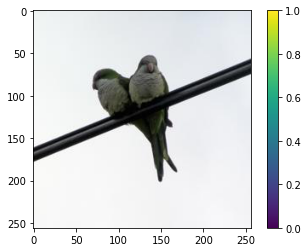

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


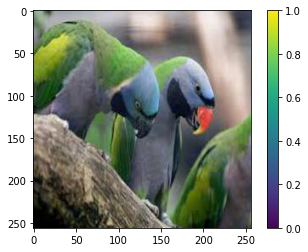

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


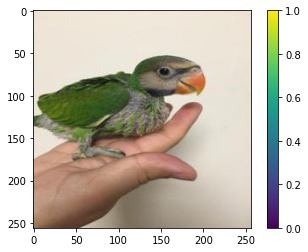

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
## Give one image of each type and label
legend = (sorted(os.listdir('parakeets')))
print("This is label key:")
print(legend)

for my_batch in image_generator:
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(labels[i])
    break   

Augmented data creation

Found 2267 images belonging to 11 classes.


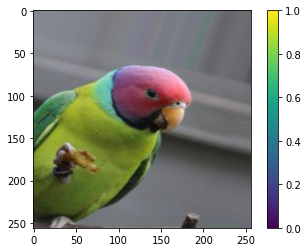

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


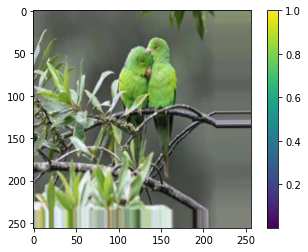

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


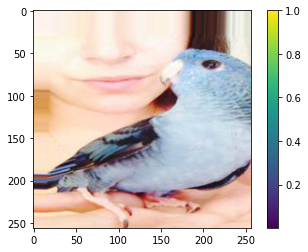

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


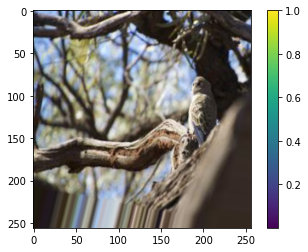

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


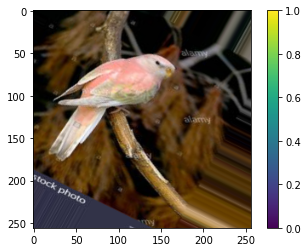

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


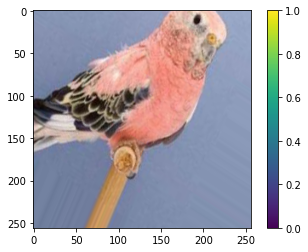

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


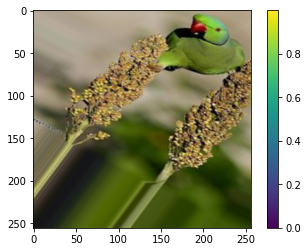

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


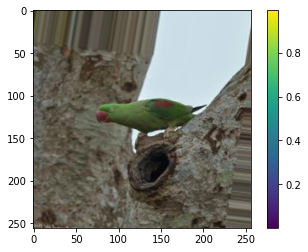

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


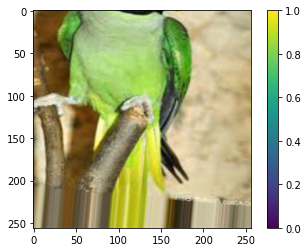

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


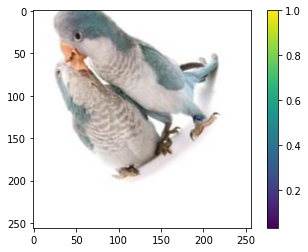

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


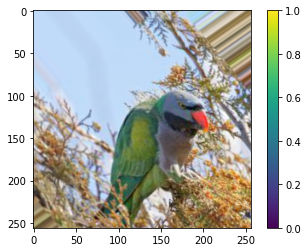

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
my_augmented_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest')

my_augmented_image_generator = my_augmented_generator.flow_from_directory( './parakeets', target_size=(256, 256), batch_size=11, class_mode='categorical')

for my_batch in my_augmented_image_generator:
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(labels[i])
    break



Overfitting models

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( MaxPool2D())
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 123, 123, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
flatten (Flatten)            (None, 468512)            0         
_________________________________________________________________
dense (Dense)                (None, 11)                5

In [25]:
# Compile
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 207, epochs = 11)

Epoch 1/11
207/207 [==============================] - 244s 1s/step - loss: 3.2508 - accuracy: 0.0964
Epoch 2/11
207/207 [==============================] - 243s 1s/step - loss: 2.3980 - accuracy: 0.0959
Epoch 3/11
207/207 [==============================] - 246s 1s/step - loss: 2.3980 - accuracy: 0.0947
Epoch 4/11
207/207 [==============================] - 243s 1s/step - loss: 2.4054 - accuracy: 0.1058
Epoch 5/11
207/207 [==============================] - 243s 1s/step - loss: 2.3043 - accuracy: 0.2327
Epoch 6/11
207/207 [==============================] - 243s 1s/step - loss: 1.3737 - accuracy: 0.5974
Epoch 7/11
207/207 [==============================] - 243s 1s/step - loss: 0.4895 - accuracy: 0.8724
Epoch 8/11
207/207 [==============================] - 242s 1s/step - loss: 0.2550 - accuracy: 0.9454
Epoch 9/11
207/207 [==============================] - 242s 1s/step - loss: 0.0913 - accuracy: 0.9834
Epoch 10/11
207/207 [==============================] - 241s 1s/step - loss: 0.0804 - accura

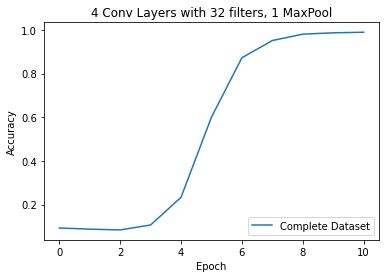

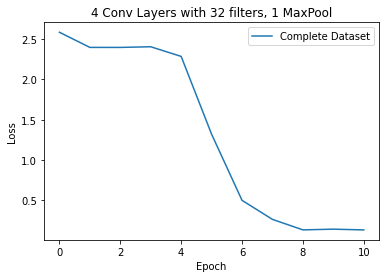

In [26]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '4 Conv Layers with 32 filters, 1 MaxPool'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

In [27]:
import matplotlib.pyplot as plt

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2032128)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                22353419  
Total params: 22,363,563
Trainable params: 22,363,563
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 207, epochs = 11)

Epoch 1/11
207/207 [==============================] - 329s 2s/step - loss: 9.9551 - accuracy: 0.1029
Epoch 2/11
207/207 [==============================] - 333s 2s/step - loss: 2.1563 - accuracy: 0.3479
Epoch 3/11
207/207 [==============================] - 330s 2s/step - loss: 0.6632 - accuracy: 0.8495
Epoch 4/11
207/207 [==============================] - 328s 2s/step - loss: 0.1998 - accuracy: 0.9768
Epoch 5/11
207/207 [==============================] - 328s 2s/step - loss: 0.1797 - accuracy: 0.9932
Epoch 6/11
207/207 [==============================] - 328s 2s/step - loss: 0.0735 - accuracy: 0.9952
Epoch 7/11
207/207 [==============================] - 328s 2s/step - loss: 0.0874 - accuracy: 0.9943
Epoch 8/11
207/207 [==============================] - 328s 2s/step - loss: 0.0451 - accuracy: 0.9958
Epoch 9/11
207/207 [==============================] - 330s 2s/step - loss: 0.1104 - accuracy: 0.9889
Epoch 10/11
207/207 [==============================] - 329s 2s/step - loss: 0.0602 - accura

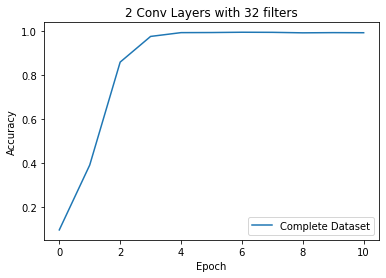

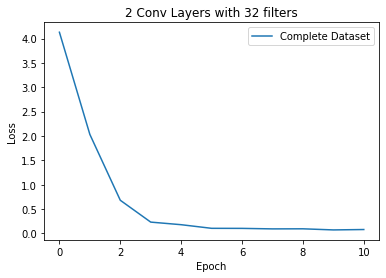

In [30]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '2 Conv Layers with 32 filters'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

In [31]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt

In [32]:
model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2064512)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                22709643  
Total params: 22,710,539
Trainable params: 22,710,539
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 207, epochs = 11)

Epoch 1/11
207/207 [==============================] - 85s 406ms/step - loss: 60.3595 - accuracy: 0.1171
Epoch 2/11
207/207 [==============================] - 84s 404ms/step - loss: 1.4645 - accuracy: 0.6811
Epoch 3/11
207/207 [==============================] - 84s 404ms/step - loss: 0.3011 - accuracy: 0.9741
Epoch 4/11
207/207 [==============================] - 84s 404ms/step - loss: 0.0687 - accuracy: 0.9921
Epoch 5/11
207/207 [==============================] - 83s 401ms/step - loss: 0.1069 - accuracy: 0.9942
Epoch 6/11
207/207 [==============================] - 83s 402ms/step - loss: 0.1291 - accuracy: 0.9948
Epoch 7/11
207/207 [==============================] - 83s 403ms/step - loss: 0.1139 - accuracy: 0.9926
Epoch 8/11
207/207 [==============================] - 84s 404ms/step - loss: 0.2460 - accuracy: 0.9937
Epoch 9/11
207/207 [==============================] - 84s 403ms/step - loss: 0.0330 - accuracy: 0.9957
Epoch 10/11
207/207 [==============================] - 84s 404ms/step - 

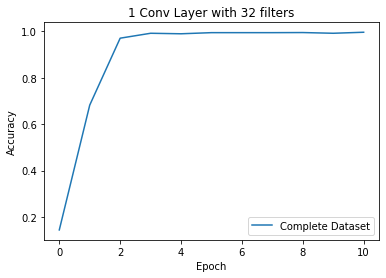

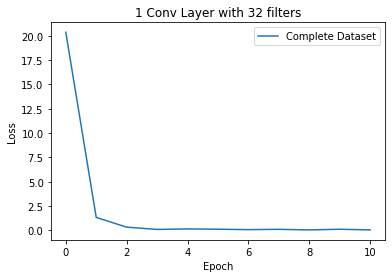

In [34]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '1 Conv Layer with 32 filters'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( MaxPool2D())
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 123, 123, 64)      36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 121, 121, 64)      36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 937024)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 11)               

In [36]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 205, epochs = 11)

Epoch 1/11
205/205 [==============================] - 608s 3s/step - loss: 3.5592 - accuracy: 0.0957
Epoch 2/11
205/205 [==============================] - 607s 3s/step - loss: 2.3973 - accuracy: 0.1023
Epoch 3/11
205/205 [==============================] - 604s 3s/step - loss: 2.3828 - accuracy: 0.1204
Epoch 4/11
205/205 [==============================] - 602s 3s/step - loss: 2.1892 - accuracy: 0.3680
Epoch 5/11
205/205 [==============================] - 603s 3s/step - loss: 1.0043 - accuracy: 0.6759
Epoch 6/11
205/205 [==============================] - 606s 3s/step - loss: 0.4106 - accuracy: 0.8822
Epoch 7/11
205/205 [==============================] - 602s 3s/step - loss: 0.2611 - accuracy: 0.9442
Epoch 8/11
205/205 [==============================] - 602s 3s/step - loss: 0.1548 - accuracy: 0.9801
Epoch 9/11
205/205 [==============================] - 603s 3s/step - loss: 0.1204 - accuracy: 0.9867
Epoch 10/11
205/205 [==============================] - 604s 3s/step - loss: 0.0940 - accura

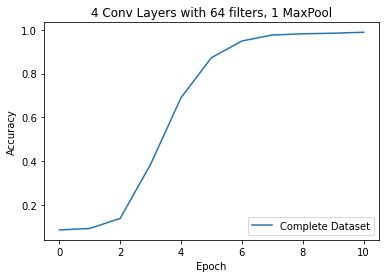

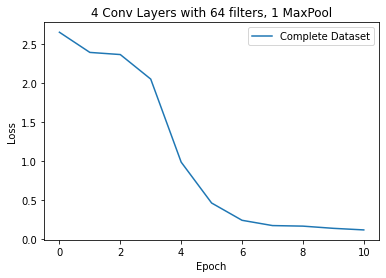

In [37]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '4 Conv Layers with 64 filters, 1 MaxPool'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( MaxPool2D())
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D())
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D())
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)       

In [39]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 205, epochs = 11)

Epoch 1/11
205/205 [==============================] - 147s 716ms/step - loss: 2.4053 - accuracy: 0.1061
Epoch 2/11
205/205 [==============================] - 146s 711ms/step - loss: 2.2623 - accuracy: 0.2040
Epoch 3/11
205/205 [==============================] - 146s 710ms/step - loss: 2.1480 - accuracy: 0.2786
Epoch 4/11
205/205 [==============================] - 145s 706ms/step - loss: 1.9005 - accuracy: 0.3550
Epoch 5/11
205/205 [==============================] - 144s 704ms/step - loss: 1.4117 - accuracy: 0.5416
Epoch 6/11
205/205 [==============================] - 145s 707ms/step - loss: 0.8002 - accuracy: 0.7472
Epoch 7/11
205/205 [==============================] - 145s 709ms/step - loss: 0.3641 - accuracy: 0.9017
Epoch 8/11
205/205 [==============================] - 145s 705ms/step - loss: 0.2427 - accuracy: 0.9491
Epoch 9/11
205/205 [==============================] - 149s 725ms/step - loss: 0.1515 - accuracy: 0.9619
Epoch 10/11
205/205 [==============================] - 144s 702m

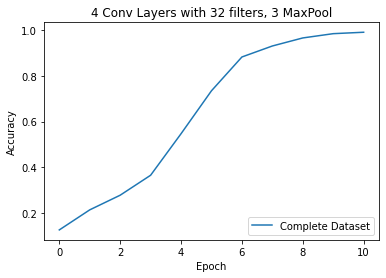

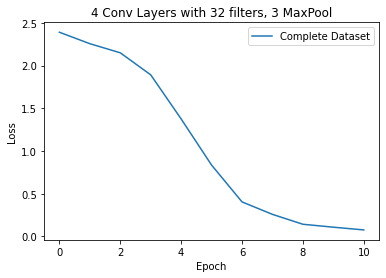

In [40]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '4 Conv Layers with 32 filters, 3 MaxPool'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 16)      2320      
_________________________________________________________________
flatten (Flatten)            (None, 1016064)           0         
_________________________________________________________________
dense (Dense)                (None, 11)                11176715  
Total params: 11,179,483
Trainable params: 11,179,483
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 205, epochs = 11)

Epoch 1/11
205/205 [==============================] - 155s 754ms/step - loss: 8.9223 - accuracy: 0.1124
Epoch 2/11
205/205 [==============================] - 153s 747ms/step - loss: 1.1569 - accuracy: 0.7452
Epoch 3/11
205/205 [==============================] - 152s 743ms/step - loss: 0.1990 - accuracy: 0.9777
Epoch 4/11
205/205 [==============================] - 151s 739ms/step - loss: 0.0948 - accuracy: 0.9936
Epoch 5/11
205/205 [==============================] - 151s 738ms/step - loss: 0.1232 - accuracy: 0.9923
Epoch 6/11
205/205 [==============================] - 151s 738ms/step - loss: 0.0802 - accuracy: 0.9921
Epoch 7/11
205/205 [==============================] - 151s 739ms/step - loss: 0.1108 - accuracy: 0.9934
Epoch 8/11
205/205 [==============================] - 151s 738ms/step - loss: 0.1038 - accuracy: 0.9902
Epoch 9/11
205/205 [==============================] - 151s 736ms/step - loss: 0.1105 - accuracy: 0.9940
Epoch 10/11
205/205 [==============================] - 151s 737m

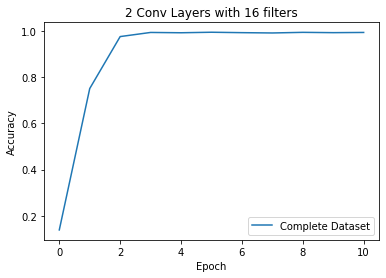

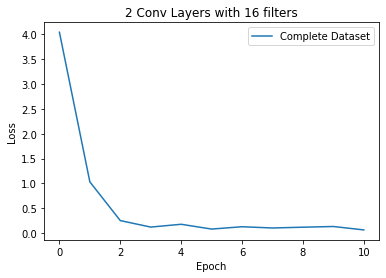

In [24]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '2 Conv Layers with 16 filters'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()